In [7]:
import os
import pandas as pd

def load_data_from_folder(folder_path):
    # List all files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith(".txt") or f.endswith(".csv") or f.endswith(".out")]
    
    # Initialize an empty dictionary to store data
    data_dict = {}
    
    # Loop through each file
    for file in files:
        file_path = os.path.join(folder_path, file)
        
        # Read the file, assuming space-separated values, skipping the first two rows
        df = pd.read_csv(file_path, delim_whitespace=True, skiprows=2, header=None)
        
        # Check if the expected number of columns exist
        if df.shape[1] < 3:
            raise ValueError(f"File {file} does not have the expected number of columns")
        
        # Extract column name from the second column of the third row
        column_name = os.path.splitext(file)[0].replace('-rfile', '')  # Use the file name (without extension) as the column name
        
        # Store the "Time Step" and "flow-time" only once
        if "Time Step" not in data_dict:
            data_dict["Time Step"] = df.iloc[:, 0]  # First column is "Time Step"
            data_dict["flow-time"] = df.iloc[:, 2]  # Third column is "flow-time"

        # Store the unique data column using the file name as the column name
        data_dict[column_name] = df.iloc[:, 1]  # Second column is the datum
    
    # Convert the dictionary to a DataFrame
    final_df = pd.DataFrame(data_dict)
    # Delete the first row of the DataFrame
    final_df = final_df.drop(index=0)
    
    # Convert all columns to double (float) type
    final_df = final_df.astype(float)
    
    return final_df

# Example usage
folder_path = "TSR 0.8"  # Change this to the actual folder path
df_08 = load_data_from_folder(folder_path)

folder_path = "TSR_06"  # Change this to the actual folder path
df_06 = load_data_from_folder(folder_path)

folder_path = "TSR_04"  # Change this to the actual folder path
df_04 = load_data_from_folder(folder_path)

print(df_08)

      Time Step  flow-time          cd         cl        cm          fd  \
1           0.0       0.00    0.000000   0.000000  0.000000    0.000000   
2           1.0       0.01  151.686607  14.424268  0.413259  174.769116   
3           2.0       0.02    1.125078   6.945115 -0.038385    1.296284   
4           3.0       0.03    0.397874   7.092581 -0.047938    0.458419   
5           4.0       0.04    0.860720   6.915567 -0.075157    0.991698   
...         ...        ...         ...        ...       ...         ...   
1997     1996.0      19.96    0.648546   6.506008  0.185914    0.747237   
1998     1997.0      19.97    0.642290   6.502588  0.186272    0.740029   
1999     1998.0      19.98    0.657418   6.479622  0.192906    0.757459   
2000     1999.0      19.99    0.645137   6.448020  0.192894    0.743309   
2001     2000.0      20.00    0.655440   6.401320  0.203984    0.755180   

             fl         m  
1      0.000000  0.000000  
2     16.619243  0.081421  
3      8.001969

C:\Users\nicoa\AppData\Local\Temp\ipykernel_18368\4148111323.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, skiprows=2, header=None)
C:\Users\nicoa\AppData\Local\Temp\ipykernel_18368\4148111323.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, skiprows=2, header=None)
C:\Users\nicoa\AppData\Local\Temp\ipykernel_18368\4148111323.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, skiprows=2, header=None)
C:\Users\nicoa\AppData\Local\Temp\ipykernel_18368\4148111323.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is depr

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_polar(df, RPM, k=10):
    # Plot Time Step vs cl, cd, cm
    plt.figure()
    plt.plot(df["flow-time"][k:], df["cl"][k:], label='Cl')
    plt.plot(df["flow-time"][k:], df["cd"][k:], label='Cd')
    plt.plot(df["flow-time"][k:], df["cm"][k:], label='Cm')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Coeficiente Adimencional')
    plt.title("Coeficientes adimensionales vs Tiempo")
    plt.legend()
    plt.show()

    # Calculate Theta
    w = RPM * np.pi / 30
    df["Theta"] = df["flow-time"] * w+np.pi/2
    k = 2

    # Crear subplots polares
    fig, axs = plt.subplots(1, 3, subplot_kw={'polar': True}, figsize=(15, 10))

    # Polar plot of Theta vs cl
    axs[0].plot(df["Theta"][k:], df["cl"][k:])
    axs[0].set_xlabel('Theta')
    axs[0].set_ylabel('cl')
    axs[0].set_title('Polar Theta vs Cl\n')

    # Polar plot of Theta vs cd
    axs[1].plot(df["Theta"][k:], df["cd"][k:])
    axs[1].set_xlabel('Theta')
    axs[1].set_ylabel('cd')
    axs[1].set_title('Polar Theta vs Cd\n')

    # Polar plot of Theta vs cm
    axs[2].plot(df["Theta"][k:], df["cm"][k:])
    axs[2].set_xlabel('Theta')
    axs[2].set_ylabel('cm')
    axs[2].set_title('Polar  Theta vs Cm\n')

    plt.tight_layout()
    plt.show()

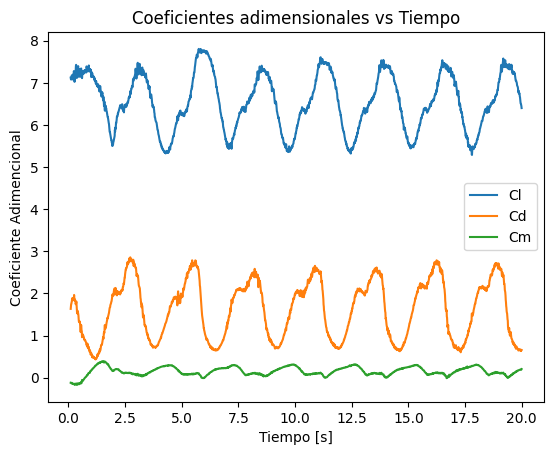

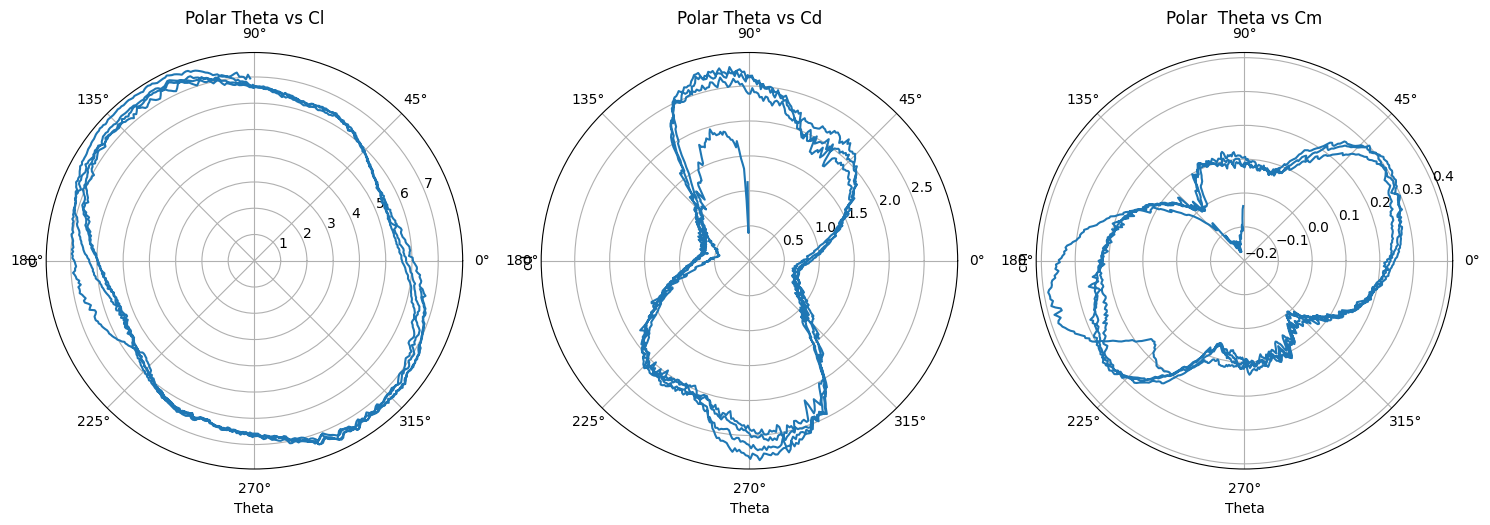

In [9]:
plot_polar(df_08, RPM=11.1688)

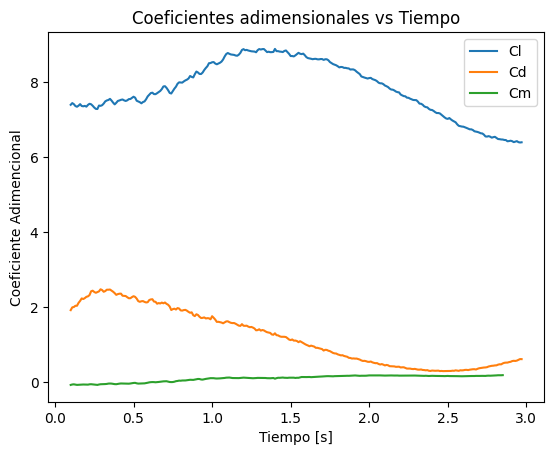

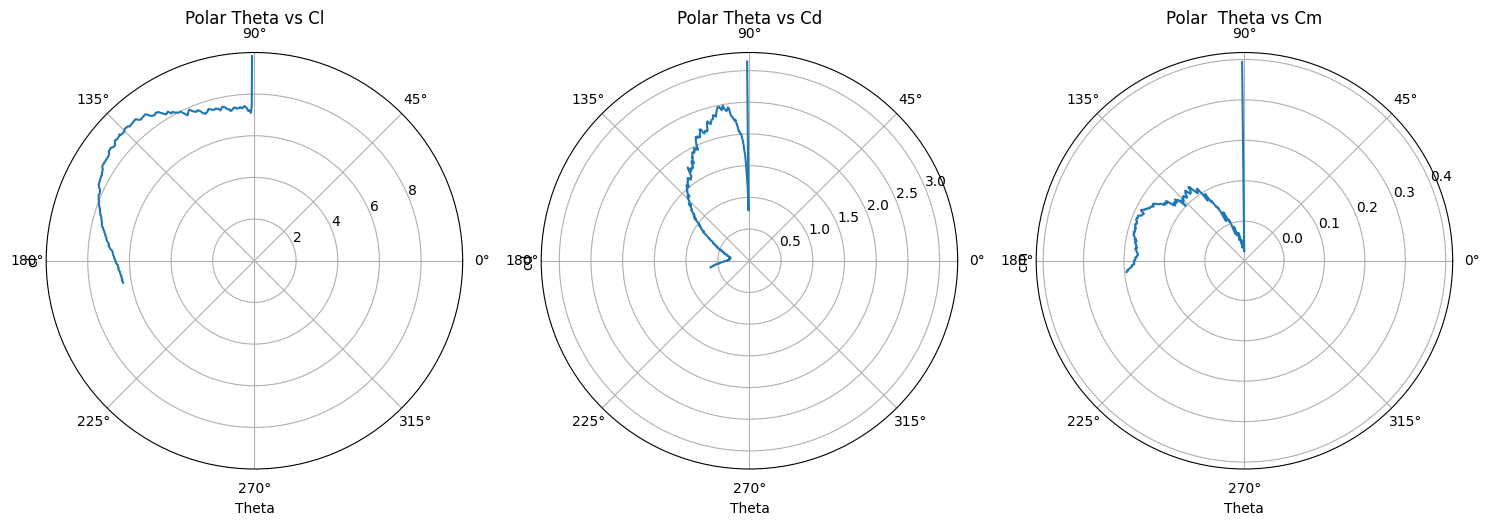

In [10]:
plot_polar(df_04, RPM=5.5848)

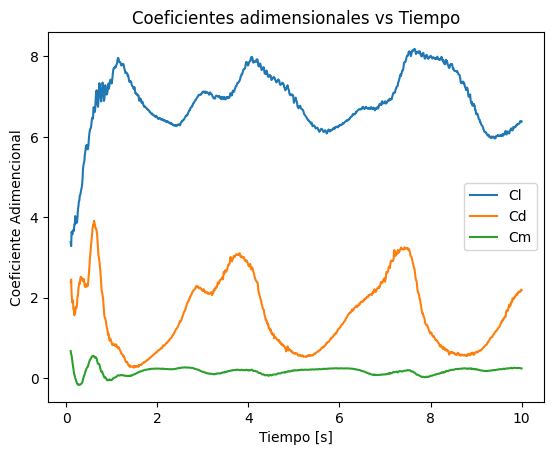

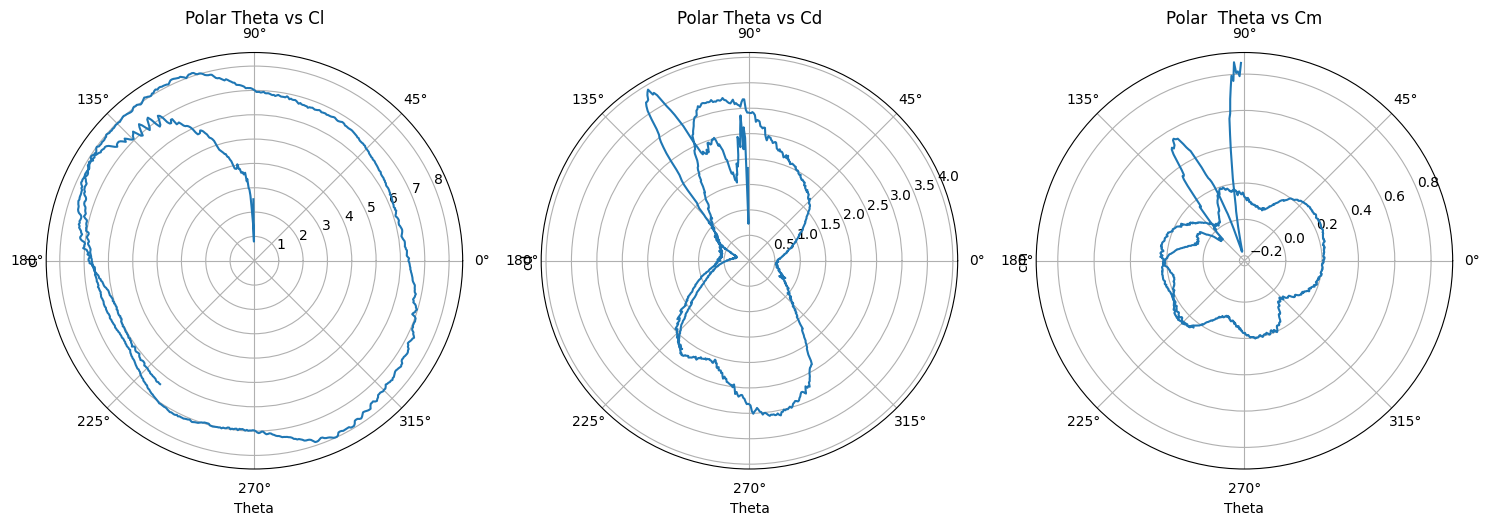

In [11]:
plot_polar(df_06, RPM=8.3766)

   TSR      RPM    cl_rms    cd_rms    cm_rms    Cp_rms
0  0.8  11.1688  6.596696  1.759292  0.182485  0.145988
1  0.6   8.3766  6.924172  1.785619  0.192534  0.115521
2  0.4   5.5848  7.839733  1.410456  0.134726  0.053890


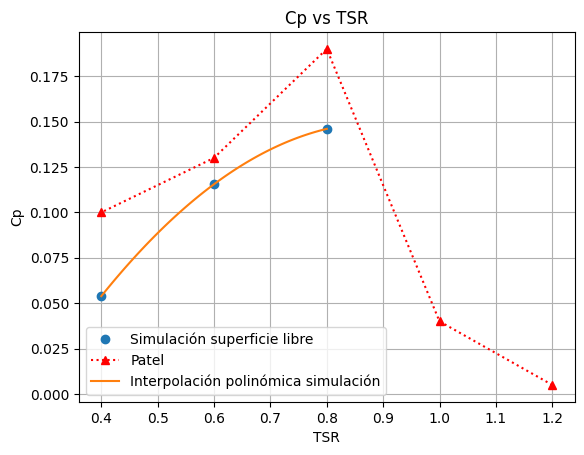

In [12]:
from scipy.interpolate import splrep, splev

def calculate_rms(data):
    return np.sqrt(np.mean(np.square(data)))
k=10
df_rm= pd.DataFrame(columns=['TSR', 'RPM', 'cl_rms', 'cd_rms', 'cm_rms'])
df_rm.loc[0] = [0.8, 11.1688, calculate_rms(df_08['cl'][k:]), calculate_rms(df_08['cd'][k:]), calculate_rms(df_08['cm'][k:])] 
df_rm.loc[1] = [0.6, 8.3766, calculate_rms(df_06['cl'][k:]), calculate_rms(df_06['cd'][k:]), calculate_rms(df_06['cm'][k:])]
df_rm.loc[2] = [0.4, 5.5848, calculate_rms(df_04['cl'][k:]), calculate_rms(df_04['cd'][k:]), calculate_rms(df_04['cm'][k:])]
df_rm["Cp_rms"]=df_rm["TSR"]*df_rm["cm_rms"]
print(df_rm)   

#Datos paper
Cp_paper = [0.005, 0.04, 0.19, 0.13, 0.1]
TSR = [1.2, 1, 0.8, 0.6, 0.4]

# Interpolación polinómica para los datos de simulación
degree = 2  # Grado del polinomio
coefficients_sim = np.polyfit(df_rm["TSR"], df_rm["Cp_rms"], degree)
polynomial_sim = np.poly1d(coefficients_sim)
TSR_interpolated_sim = np.linspace(min(df_rm["TSR"]), max(df_rm["TSR"]), 100)
Cp_interpolated_sim = polynomial_sim(TSR_interpolated_sim)

# Gráfico
plt.plot(df_rm["TSR"], df_rm["Cp_rms"], 'o', label="Simulación superficie libre")
plt.plot(TSR, Cp_paper, 'r:^', label="Patel")
plt.plot(TSR_interpolated_sim, Cp_interpolated_sim, '-', label="Interpolación polinómica simulación")
plt.title('Cp vs TSR')  
plt.xlabel('TSR')
plt.ylabel('Cp')
plt.legend()
plt.grid()
plt.show()